# Employee Attrition Prediction

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

### Etape 1 : Chargement et importation du dataset

In [67]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [36]:
# Noms des colonnes 
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [37]:
# forme 
df.shape

(1470, 35)

In [38]:
# informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [39]:
# Valeurs manquantes 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Etape 2 :  Exploratory Data Analysis

In [40]:
# Statistiques descriptives 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### Etude des distributions

Text(0.5, 1.0, "Distribution de l'âge")

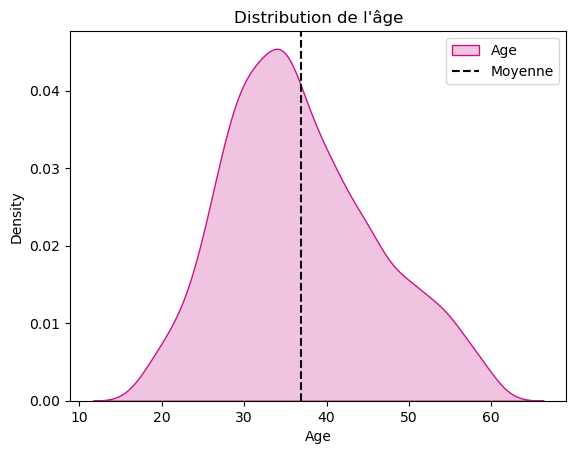

In [41]:
# Age
sns.kdeplot(df['Age'], color='MediumVioletRed', shade=True, label='Age')
plt.axvline(x=df['Age'].mean(), color='k', linestyle="--", label='Moyenne')
plt.legend()
plt.title("Distribution de l'âge")

**La plupart des emloyées ont entre 30 et 40 ans**

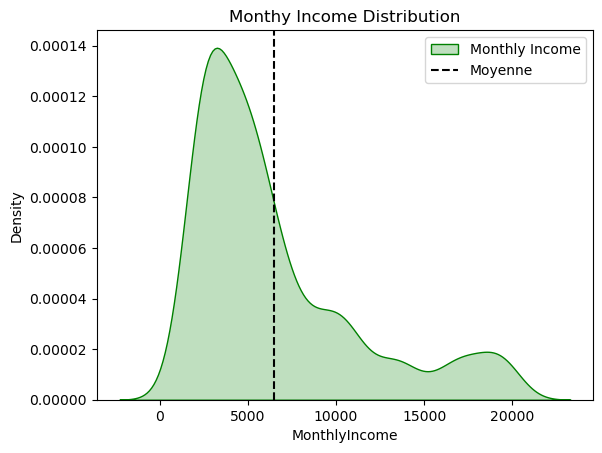

In [42]:
# Monthly Income
sns.kdeplot(df['MonthlyIncome'], color='Green', shade=True, label='Monthly Income')
plt.axvline(df['MonthlyIncome'].mean(), color='k', linestyle='--', label='Moyenne')
plt.legend()
plt.title('Monthy Income Distribution')
plt.show()

**Beaucoup d'employé sont payés 2500$**

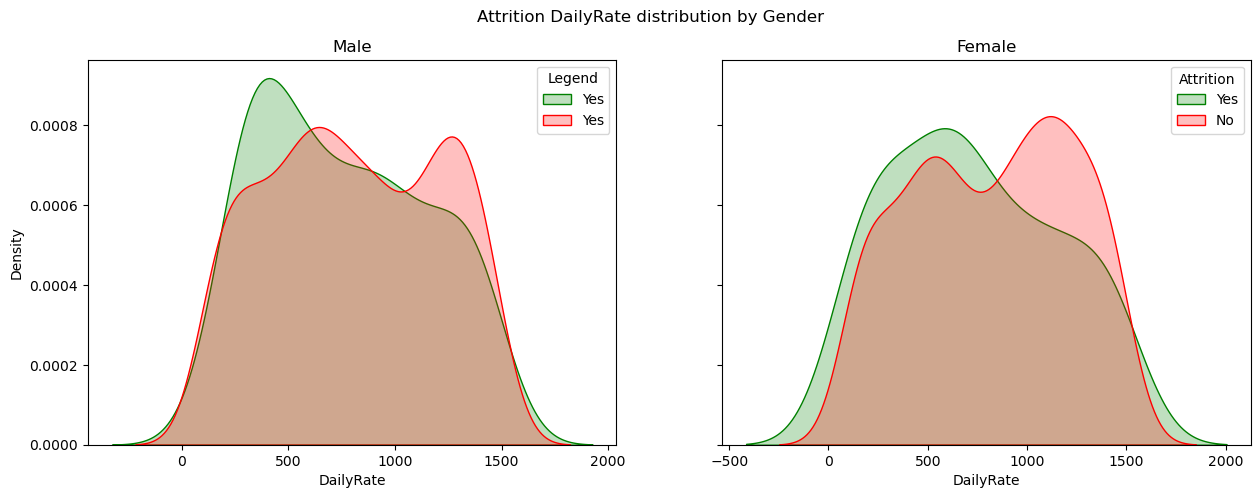

In [44]:
# Attrition DailyRate by Gender
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
fig.suptitle('Attrition DailyRate distribution by Gender')
sns.kdeplot(ax=axes[0], x=df[(df['Gender']=='Male') & (df['Attrition']=='Yes')]['DailyRate'],
            color='green', shade=True, label='Yes')
sns.kdeplot(ax=axes[0], x=df[(df['Gender']=='Male') & (df['Attrition'] == 'No')]['DailyRate'],
            color='red', shade=True, label='Yes')
axes[0].set_title('Male')
axes[0].legend(title='Legend')

sns.kdeplot(ax=axes[1], x=df[(df['Gender'] == 'Female') & (df['Attrition'] == 'Yes')]['DailyRate'],
            color='green', shade=True, label='Yes')
sns.kdeplot(ax=axes[1], x=df[(df['Gender'] == 'Female') & (df['Attrition'] == 'No')]['DailyRate'],
            color='red', shade=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()

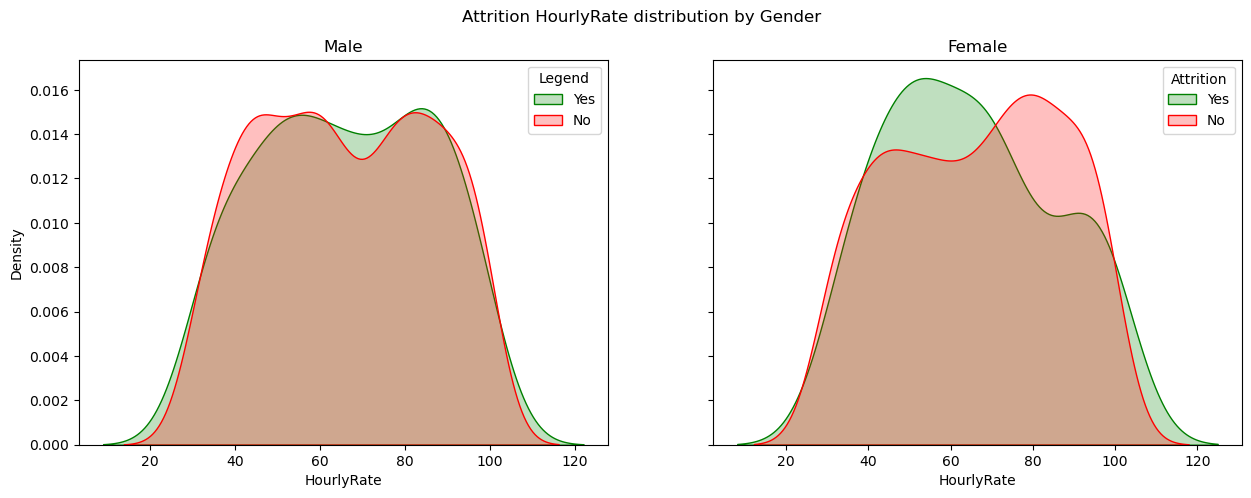

In [49]:
# Attrition HOURLYRATE by Gender
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
fig.suptitle('Attrition HourlyRate distribution by Gender')
sns.kdeplot(ax=axes[0], x=df[(df['Gender']=='Male') & (df['Attrition']=='Yes')]['HourlyRate'],
            color='green', shade=True, label='Yes')
sns.kdeplot(ax=axes[0], x=df[(df['Gender']=='Male') & (df['Attrition'] == 'No')]['HourlyRate'],
            color='red', shade=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Legend')

sns.kdeplot(ax=axes[1], x=df[(df['Gender'] == 'Female') & (df['Attrition'] == 'Yes')]['HourlyRate'],
            color='green', shade=True, label='Yes')
sns.kdeplot(ax=axes[1], x=df[(df['Gender'] == 'Female') & (df['Attrition'] == 'No')]['HourlyRate'],
            color='red', shade=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()

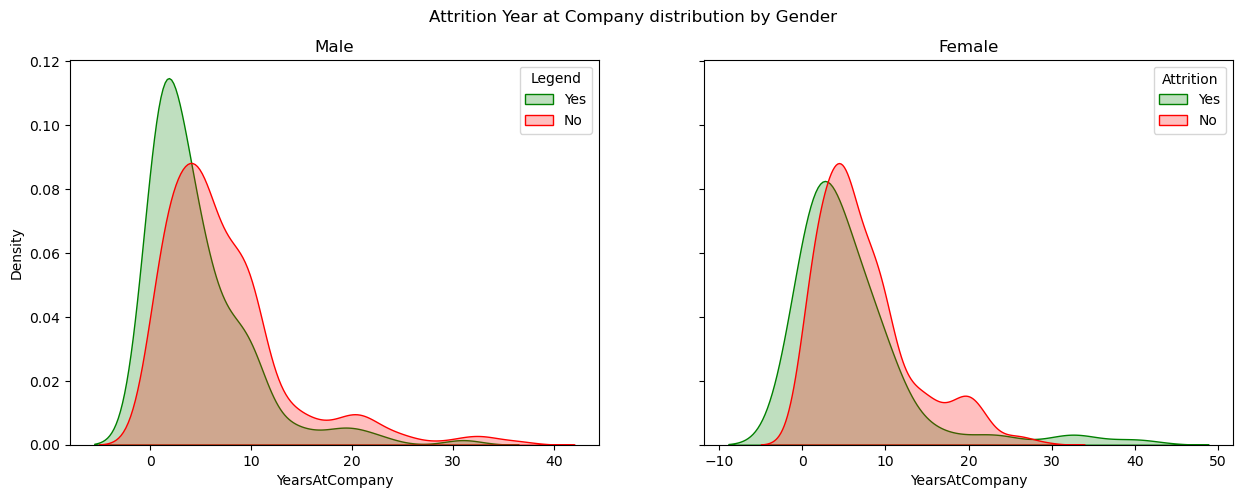

In [54]:
# Attrition Years at Company by gender
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
fig.suptitle('Attrition Year at Company distribution by Gender')
sns.kdeplot(ax=axes[0], x=df[(df['Gender']=='Male') & (df['Attrition']=='Yes')]['YearsAtCompany'],
            color='green', shade=True, label='Yes')
sns.kdeplot(ax=axes[0], x=df[(df['Gender']=='Male') & (df['Attrition'] == 'No')]['YearsAtCompany'],
            color='red', shade=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Legend')

sns.kdeplot(ax=axes[1], x=df[(df['Gender'] == 'Female') & (df['Attrition'] == 'Yes')]['YearsAtCompany'],
            color='green', shade=True, label='Yes')
sns.kdeplot(ax=axes[1], x=df[(df['Gender'] == 'Female') & (df['Attrition'] == 'No')]['YearsAtCompany'],
            color='red', shade=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()

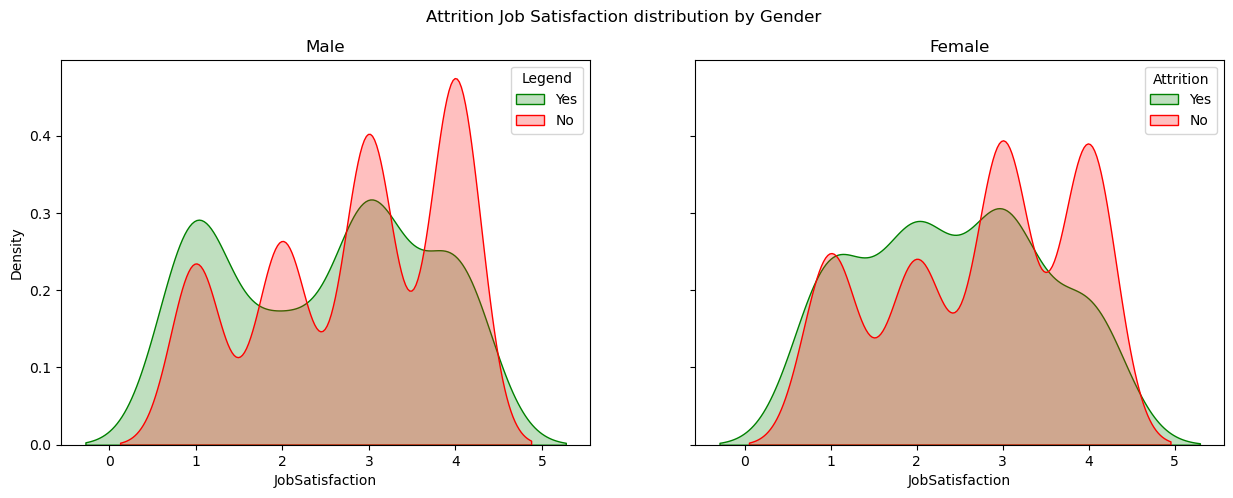

In [52]:
# Attrition Job Satisfaction at Company by gender
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
fig.suptitle('Attrition Job Satisfaction distribution by Gender')
sns.kdeplot(ax=axes[0], x=df[(df['Gender']=='Male') & (df['Attrition']=='Yes')]['JobSatisfaction'],
            color='green', shade=True, label='Yes')
sns.kdeplot(ax=axes[0], x=df[(df['Gender']=='Male') & (df['Attrition'] == 'No')]['JobSatisfaction'],
            color='red', shade=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Legend')

sns.kdeplot(ax=axes[1], x=df[(df['Gender'] == 'Female') & (df['Attrition'] == 'Yes')]['JobSatisfaction'],
            color='green', shade=True, label='Yes')
sns.kdeplot(ax=axes[1], x=df[(df['Gender'] == 'Female') & (df['Attrition'] == 'No')]['JobSatisfaction'],
            color='red', shade=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()

**La majorité est plutôt satisfait de son emploi**

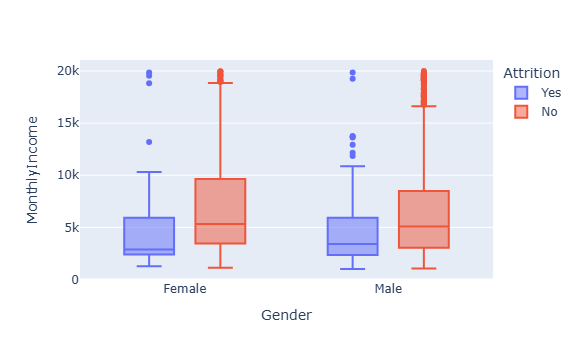

In [60]:
# Visualisation de la répartition de quelques données
px.box(data_frame=df , x = 'Gender', y = 'MonthlyIncome', color='Attrition')

**Disons que la plupart des employés sont rénumérés entre 2500 et 8000 dollars par mois** 

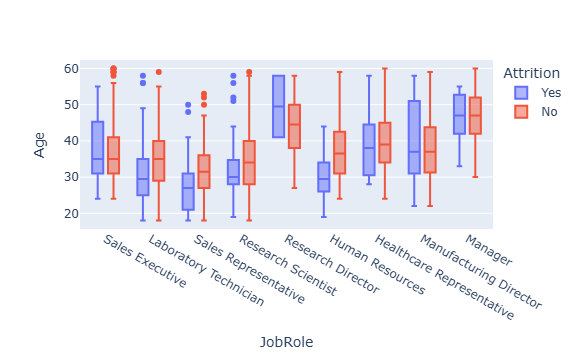

In [63]:
px.box(data_frame=df, x = 'JobRole', y= 'Age', color='Attrition')

****Manager and Research Director** sont les deux postes avec les employés les plus âgés (sûrement les plus expérimenté)**

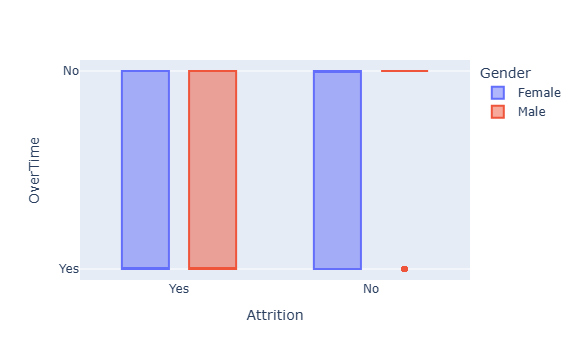

In [66]:
px.box(data_frame=df, x ='Attrition', y = 'OverTime', color='Gender')

**L'une des causes(ou la cause) principale du départ des employés est faire des heures supplémentaires**

In [68]:
# Corrélations
df.corr(numeric_only=True)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


**Les constantes sont à supprimer pour afficher la matrice de corrélation**

In [69]:
df.drop(['EmployeeCount', 'StandardHours'], axis=1, inplace=True)

<Axes: >

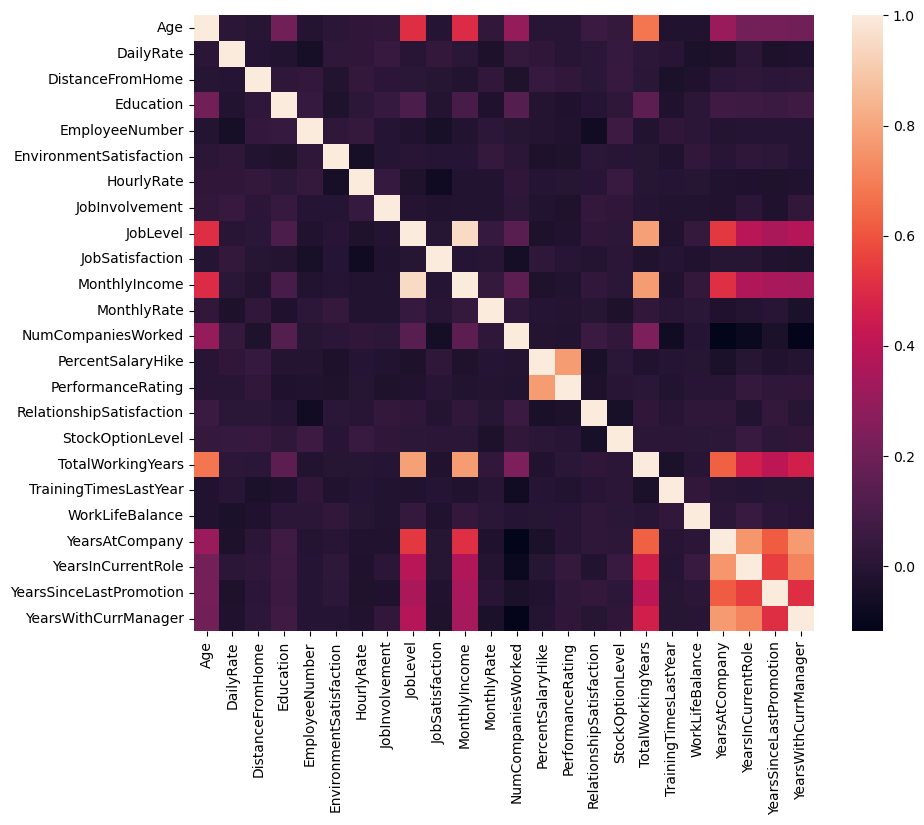

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True))

### 2. Preprocessing 

In [72]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder

In [73]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']
num_features = make_column_selector(dtype_exclude=object)
cat_features = make_column_selector(dtype_include=object)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)       

In [74]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [77]:
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
x = df.drop('Attrition', axis=1)
y = df['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### 3. Modélisation

In [78]:
# Nous testerons deux modèles 
# 1. Regression logistique 
logistic_model = Pipeline([
    ('preprocessor', preprocessor),
    ('logistic', LogisticRegression(class_weight='balanced'))
])

In [79]:
# 2. Random Forest
rf_model = Pipeline([
    ('preprocesor', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=100,
                                  max_depth=8,
                                  min_samples_split=7,
                                  min_samples_leaf=5,
                                  n_jobs=-1,
                                  class_weight='balanced'))])

In [80]:
logistic_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021EC58E3CB0>),
                                                 ('cat', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021EC21DF610>)])),
                ('logistic', LogisticRegression(class_weight='balanced'))])

In [81]:
# Evaluation de sa performance sur les mêmes données d'entraînements
logistic_model.score(x_train, y_train)

0.7876588021778584

In [82]:
# Evaluation plus poussée
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
cross_val_score(logistic_model, x_train, y_train, cv = cv).mean()

np.float64(0.7712793089263678)

In [83]:
rf_model.fit(x_train, y_train)

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021EC58E3CB0>),
                                                 ('cat', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021EC21DF610>)])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        min_samples_leaf=5, min_samples_split=7,
                                        n_jobs=-1))])

In [84]:
rf_model.score(x_train, y_train)

0.9401088929219601

In [85]:
# Evaluation poussée
cross_val_score(rf_model, x_train, y_train, cv=cv).mean()

np.float64(0.8511641299876593)

In [86]:
# Comparaison des performances 
from sklearn.metrics import *
# 1. Logistique
y_pred = logistic_model.predict(x_test)
accuracy_1 = round(accuracy_score(y_test, y_pred),2)
precision_1 = round(precision_score(y_test, y_pred, pos_label='Yes'),2)
recall_1 = round(recall_score(y_test, y_pred, pos_label='Yes'),2)
f_1_score_1 = round(f1_score(y_test, y_pred, pos_label='Yes'),2)


# 2. Random Forest
y_pred_2 = rf_model.predict(x_test)
accuracy_2 = round(accuracy_score(y_test, y_pred_2),2)
precision_2 = round(precision_score(y_test, y_pred_2, pos_label='Yes'),2)
recall_2 = round(recall_score(y_test, y_pred_2, pos_label='Yes'),2)
f_1_score_2 = round(f1_score(y_test, y_pred_2, pos_label='Yes'),2)

In [87]:
print("Régression logistique ")
print(f"Accuracy = {accuracy_1}")
print(f"Precision = {precision_1}")
print(f"Recall = {recall_1}")
print(f"F1_ = {f_1_score_1}")
print("Random Forest")
print(f"Accuracy = {accuracy_2}")
print(f"Precision = {precision_2}")
print(f"Recall = {recall_2}")
print(f"F1_ = {f_1_score_2}")

Régression logistique 
Accuracy = 0.74
Precision = 0.27
Recall = 0.58
F1_ = 0.37
Random Forest
Accuracy = 0.85
Precision = 0.38
Recall = 0.31
F1_ = 0.34


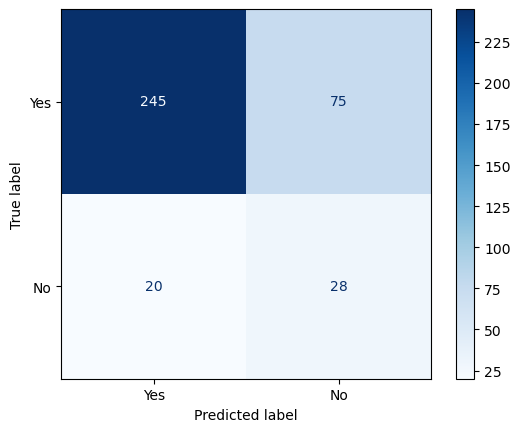

In [88]:
# Matrice de confusion
# Régression Logistique
cm_1 = confusion_matrix(y_test, y_pred)
cm_disp_1 = ConfusionMatrixDisplay(
    cm_1, display_labels=['Yes', 'No']
)
cm_disp_1.plot(cmap='Blues')

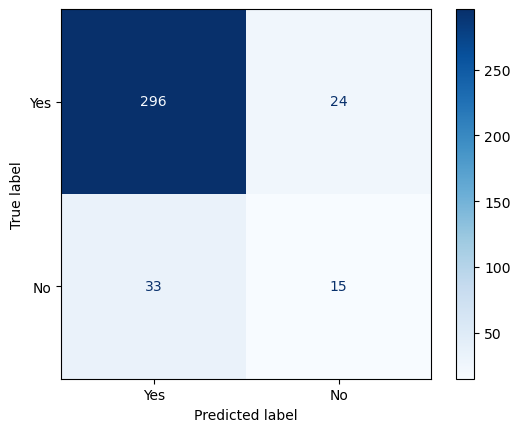

In [89]:
# Random Forest
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_disp_2 = ConfusionMatrixDisplay(
    cm_2, display_labels=['Yes', 'No']
)
cm_disp_2.plot(cmap='Blues')

### 4. Optimisation

In [90]:
# Trouvons les meilleures hyperparamètres pour nos modèles 
log_param = {
    'logistic__C' : [0.01, 0.1, 1, 10, 100],
    'logistic__max_iter' : [500, 1000, 1500, 2000]
}
rf_param = {
    'rf__n_estimators' : [50, 100, 150, 200, 500, 1000],
    'rf__max_depth' : [5, 6, 7, 8, 9, 10],
    'rf__min_samples_split' : [8, 9, 10, 11, 12, 15],
    'rf__min_samples_leaf' : [4, 5, 6, 7],
    'rf__n_jobs' : [-1]
}


In [91]:
log_grid = GridSearchCV(logistic_model, param_grid=log_param, cv=cv)
rf_grid = GridSearchCV(rf_model, param_grid=rf_param, cv=cv)

In [92]:
log_grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         RobustScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021EC58E3CB0>),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021EC21DF610>)])),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 10, 100],
                         'logistic__max_iter': [500, 1000, 1500, 2000]})

In [93]:
log_grid.best_params_

{'logistic__C': 1, 'logistic__max_iter': 500}

In [ ]:
rf_grid.fit(x_train, y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
# Nous pouvons réevaluer les performances
y_pred = log_grid.predict(x_test)
accuracy_1 = round(accuracy_score(y_test, y_pred),2)
precision_1 = round(precision_score(y_test, y_pred, pos_label='Yes'),2)
recall_1 = round(recall_score(y_test, y_pred, pos_label='Yes'),2)
f_1_score_1 = round(f1_score(y_test, y_pred, pos_label='Yes'),2)


# 2. Random Forest
y_pred_2 = rf_grid.predict(x_test)
accuracy_2 = round(accuracy_score(y_test, y_pred_2),2)
precision_2 = round(precision_score(y_test, y_pred_2, pos_label='Yes'),2)
recall_2 = round(recall_score(y_test, y_pred_2, pos_label='Yes'),2)
f_1_score_2 = round(f1_score(y_test, y_pred_2, pos_label='Yes'),2)

In [ ]:
print("Régression logistique ")
print(f"Accuracy = {accuracy_1}")
print(f"Precision = {precision_1}")
print(f"Recall = {recall_1}")
print(f"F1_ = {f_1_score_1}")
print("Random Forest")
print(f"Accuracy = {accuracy_2}")
print(f"Precision = {precision_2}")
print(f"Recall = {recall_2}")
print(f"F1_ = {f_1_score_2}")


In [ ]:
# Nouvelles matrices de confusions
# Régression Logistique
cm_1 = confusion_matrix(y_test, y_pred)
cm_disp_1 = ConfusionMatrixDisplay(
    cm_1, display_labels=['Yes', 'No']
)
cm_disp_1.plot(cmap='Blues')

In [ ]:
# Régressio
cm_1 = confusion_matrix(y_test, y_pred_2)
cm_disp_1 = ConfusionMatrixDisplay(
    cm_1, display_labels=['Yes', 'No']
)
cm_disp_1.plot(cmap='Blues')